

# Project: Investigate The Movie Database (TMDb)
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


### The dataset that the author have selected contains information about 10,000 movies collected from The Movie Database (TMDb), cleaned from Kaggle website. 

### The questions that the author is going to explore are:
1. List the top 10 highest grossing films (in terms of 2010 dollar adjusted value) and inspect the following attributes:

    - Who is the director of the movies?
    - Range of movie's runtime
    - What is the movie's genres?
    - Movie's production companies
    - Movie's vote average score
    - Movie's release year
    - Compare between its budget and revenue to see whether it is profitable (i.e. revenue_adj > budget_adj).
    

2. List top 10 movies with highest runtime
3. List top 10 movies with highest vote average score
4. List number of films released in each year
5. Find the relationship between these variables:
    - vote_average and runtime
    - vote_average and revenue_adj
    - budget_adj and revenue_adj


In [172]:
# Import necessary packages:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [173]:
# Download dataset as df:
df = pd.read_csv('tmdb-movies.csv')

<a id='wrangling'></a>
## Data Wrangling

### General Properties:

**Inspect dataset: download 3 lines of dataset:**

In [174]:
# Inspect dataset: download 3 lines of dataset 
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


**Inspect dataset's shape and data types:**

In [175]:
# Inspect dataset's shape and data types:
print("There are {} rows and {} columns in this dataset.".format(df.shape[0], df.shape[1]))
print("Below are data types in each column:")
print(df.dtypes)
print("Most data types are strings (stored in object form).")

There are 10866 rows and 21 columns in this dataset.
Below are data types in each column:
id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object
Most data types are strings (stored in object form).


**View missing value counts for each feature:**

In [176]:
# View missing value counts for each feature:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

> Most variables do not have missing values. Most columns that have many missing values will be dropped in data cleaning step as it is unnecessary in the analysis step. 

### Data Cleaning 

#### Drop unnecessary columns:

The author decided to drop 12 columns that are unnecessary for further analysis. These columns are budget, revenue, id, imdb_id, popularity, cast, homepage, tagline, keywords, overview, release_date and vote_count. The reason that the author decided to drop budget and revenue column is because the author want to use budget_adj and revenue_adj values instead as these values are in terms of 2010 dollars which accounts for inflation over time, thus movies that released on different year are comparable.

In [177]:
# Drop 12 columns that are unnecessary for further analysis:
df.drop(labels = ['budget', 'revenue', 'id', 'imdb_id', 'popularity', 'cast', 'homepage', 'tagline', 'keywords', 'overview', 'release_date', 'vote_count'], axis = 1, inplace = True)

In [178]:
# Inspect dropped dataframe: only 9 columns are remained
df.head(3)

,original_title,director,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj
0,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,1.379999e+08,1.392446e+09
1,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015,1.379999e+08,3.481613e+08
2,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015,1.012000e+08,2.716190e+08


#### Drop duplicated values:

Next, the author will check for duplicated values and remove it from dataset (if any)

In [179]:
# Check number of duplicated values:
sum(df.duplicated())

1

> There are only 1 duplicated value in the dataset. Let's see what is this value.

In [180]:
# Print duplicated values:
df[df.duplicated()]

,original_title,director,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj
2090,TEKKEN,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,5.0,2010,30000000.0,967000.0


In [181]:
# Print duplicates:
df.query('original_title == "TEKKEN"')

,original_title,director,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj
2089,TEKKEN,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,5.0,2010,30000000.0,967000.0
2090,TEKKEN,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,5.0,2010,30000000.0,967000.0


> So only the movie 'TEKKEN' has duplicated values. The author will drop duplicated value so that there is only 1 'TEKKEN' movie title in the dataset.

In [182]:
# Drop duplicate row:
df.drop_duplicates(inplace = True)

In [183]:
# Check number of rows in the dataset:
df.shape

(10865, 9)

> After dropping 1 duplicate row, only 10,865 rows remain in the dataset.

#### Check for missing values after dropping unnecessary columns:

In [184]:
# Check missing value for each column:
df.isnull().sum()

original_title             0
director                  44
runtime                    0
genres                    23
production_companies    1030
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

> All columns with missing values are string data types which cannot be imputed. Therefore the author will leave this as it is.

**Since the author will use multiple histograms both in this phase and exploration phase, the author decide to write user-defined function to avoid code repetition.**

- **Define histogram function:**

In [185]:
def histogram(x, n, xlab, ylab, graph_name):
    plt.figure(figsize = (8,6))
    plt.hist(x, bins = n)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(graph_name)
    plt.show();

#### Check number of zero values in revenue_adj and budget_adj columns:

Since in the next section the author will find insights about revenue_adj and budget_adj column, therefore it is worth to first explore the distribution of these variables to see whether outliers (if any) should be removed or not:

- **Check budget_adj variable:**

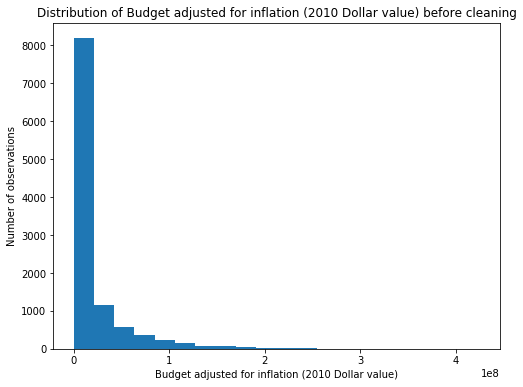

In [186]:
# Plot histogram of budget_adj:
histogram(df['budget_adj'], 20, 'Budget adjusted for inflation (2010 Dollar value)', 'Number of observations', 'Distribution of Budget adjusted for inflation (2010 Dollar value) before cleaning')

- **Check revenue_adj variable:**

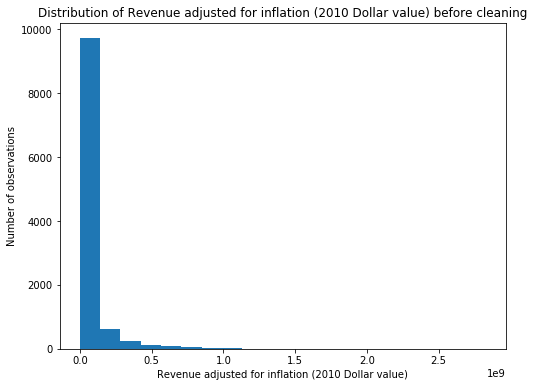

In [187]:
# Plot histogram of revenue_adj:
histogram(df['revenue_adj'], 20, 'Revenue adjusted for inflation (2010 Dollar value)', 'Number of observations', 'Distribution of Revenue adjusted for inflation (2010 Dollar value) before cleaning')

> The histogram shows that there are a lot of budget_adj and revenue_adj values that are recorded as zero which skewed the distributions. Therefore the author decided to remove all records that have budget_adj or revenue_adj values equal to zero.

- #### Remove rows that recorded revenue_adj or budget_adj as zero:

In [188]:
# Inspect rows that recorded revenue_adj or budget_adj as zero:
no_bud_rev = df[(df.revenue_adj == 0) | (df.budget_adj == 0)]
no_bud_rev.head()

,original_title,director,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj
30,Mr. Holmes,Bill Condon,103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6.4,2015,0.000000e+00,2.700677e+07
36,Solace,Afonso Poyart,101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,6.2,2015,0.000000e+00,2.056620e+07
48,Wild Card,Simon West,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,5.3,2015,2.759999e+07,0.000000e+00
67,Survivor,James McTeigue,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5.4,2015,1.839999e+07,0.000000e+00
72,Beyond the Reach,Jean-Baptiste LÃ©onetti,95,Thriller,Furthur Films,5.5,2015,0.000000e+00,4.222338e+04


In [189]:
# Inspect no_bud_rev dimension:
no_bud_rev.shape

(7011, 9)

> There are 7,011 rows that have missing budget_adj or revenue_adj values.

- **Drop rows that have budget_adj or revenue_adj recorded as zero in the dataset**

In [190]:
# Drop rows that have budget_adj or revenue_adj columns recorded as zero in the dataset:
df.drop(no_bud_rev.index, inplace = True)

In [191]:
# Inspect updated df's shape after dropping budget_adj or revenue_adj columns recorded as zero:
df.shape

(3854, 9)

> After cleaning, there are 3,854 rows left that will be used for further analysis.

<a id='eda'></a>
## Exploratory Data Analysis


### **Question 1: List the top 10 highest grossing films (in terms of 2010 dollar adjusted value) and inspect the following attributes:**
   - Who is the director of the movies?
   - Range of movie's runtime
   - What is the movie's genres?
   - Movie's production companies
   - Movie's vote average score
   - Movie's release year
   - Compare between its budget and revenue to see whether it is profitable (i.e. revenue_adj > budget_adj).

First, the author will comstruct new column: 'profit' (True if revenue_adj > budget_adj) that will be used for further analysis.

In [192]:
# Construct additional column: profit (True if revenue_adj > budget_adj)
df['profit'] = df['revenue_adj'] > df['budget_adj']

In [193]:
# Inspect added column at the end of dataframe:
df.head(3)

,original_title,director,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj,profit
0,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,1.379999e+08,1.392446e+09,True
1,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015,1.379999e+08,3.481613e+08,True
2,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015,1.012000e+08,2.716190e+08,True


Then, select top 10 highest grossing films.

In [194]:
max_rev = df.nlargest(10, ['revenue_adj']).reset_index(drop = True)
max_rev

,original_title,director,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj,profit
0,Avatar,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,7.1,2009,2.408869e+08,2.827124e+09,True
1,Star Wars,George Lucas,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,7.9,1977,3.957559e+07,2.789712e+09,True
2,Titanic,James Cameron,194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,7.3,1997,2.716921e+08,2.506406e+09,True
3,The Exorcist,William Friedkin,122,Drama|Horror|Thriller,Warner Bros.|Hoya Productions,7.2,1973,3.928928e+07,2.167325e+09,True
4,Jaws,Steven Spielberg,124,Horror|Thriller|Adventure,Universal Pictures|Zanuck/Brown Productions,7.3,1975,2.836275e+07,1.907006e+09,True
5,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015,1.839999e+08,1.902723e+09,True
6,E.T. the Extra-Terrestrial,Steven Spielberg,115,Science Fiction|Adventure|Family|Fantasy,Universal Pictures|Amblin Entertainment,7.2,1982,2.372625e+07,1.791694e+09,True
7,The Net,Irwin Winkler,114,Crime|Drama|Mystery|Thriller|Action,Columbia Pictures,5.6,1995,3.148127e+07,1.583050e+09,True
8,One Hundred and One Dalmatians,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,79,Adventure|Animation|Comedy|Family,Walt Disney Productions,6.6,1961,2.917944e+07,1.574815e+09,True
9,The Avengers,Joss Whedon,143,Science Fiction|Action|Adventure,Marvel Studios,7.3,2012,2.089437e+08,1.443191e+09,True


> **Observations:**
1. Both James Cameron and Steven Spielberg directed 2 movies (James Cameron: Avatar, Titanic/ Steven Spielberg: Jaws/ E.T.) that is in top 10 highest grossing films
2. Movies' runtime ranged from 79 minutes (lowest: One Hundred and One Dalmatians) to 194 minutes (highest: Titanic) 
3. Most top 10 highest grossing films are categorized in various genres: Action, Adventure, Fantasy, Science, Fiction, Drama, and Horror
4. Production companies that produce these movies are 20th Century Fox, Universal Pictures, Warner Brothers Studio, Columbia Pictures and Walt Disney Productions (included Marvel)
5. Movies' vote average scores ranged from 5.6 (lowest: The Net) to 7.9 (Highest: Star Wars)
6. Movies' release years ranged from 1961 (earliest: One Hundred and One Dalmatians) to 2015 (latest: Star Wars: The Force Awakens)
7. All top 10 highest grossing films are profitable (revenue_adj > budget_adj)

> **The author assumes that properties associated with high revenue movies are:**
1. Movie's runtime ranged from 1 hour up to no more than 3 hours and a half. The author assumes that this is because audience's attention is limited, hence movie's runtime must not be too long.
2. All top 10 highest grossing films are produced by well-known production companies that have expertise and budget which allow them to produce brand new movie plots that later ranked top in movie charts.

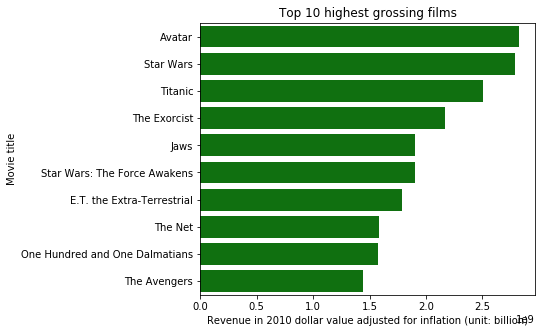

In [195]:
# Plot bar graph of the result:
plt.figure(figsize = (6, 5))
sns.barplot(x = 'revenue_adj', y = 'original_title', data = max_rev, color = "g")
plt.xlabel('Revenue in 2010 dollar value adjusted for inflation (unit: billion)')
plt.ylabel('Movie title')
plt.title('Top 10 highest grossing films')
plt.show()

Inspect budget_adj and revenue_adj distribution after cleaning:

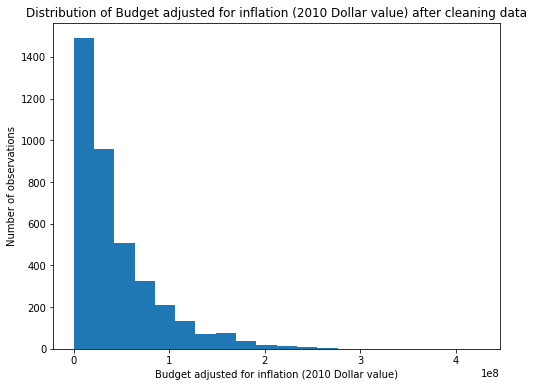

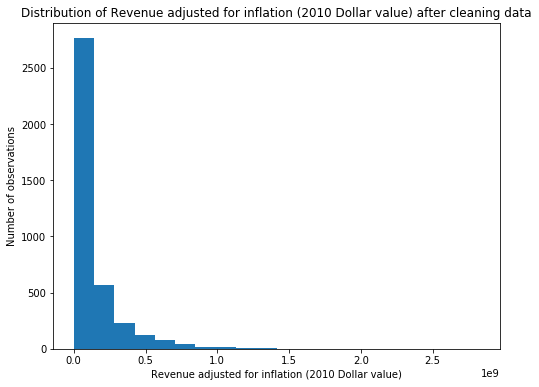

In [196]:
# Plot budget_adj and revenue_adj histograms:
histogram(df['budget_adj'], 20, 'Budget adjusted for inflation (2010 Dollar value)', 'Number of observations', 'Distribution of Budget adjusted for inflation (2010 Dollar value) after cleaning data')
histogram(df['revenue_adj'], 20, 'Revenue adjusted for inflation (2010 Dollar value)', 'Number of observations', 'Distribution of Revenue adjusted for inflation (2010 Dollar value) after cleaning data')

> Both distributions are right-skewed which means that not much high dollar values are in both distributions.

### **Question 2. List top 10 movies with highest runtime**

In [197]:
max_time = df[['original_title', 'genres', 'runtime']].nlargest(10, 'runtime').reset_index(drop = True)
max_time

,original_title,genres,runtime
0,Carlos,Crime|Drama|Thriller|History,338
1,Cleopatra,Drama|History|Romance,248
2,Heaven's Gate,Action|Drama|History|Western,219
3,Lawrence of Arabia,Adventure|Drama|History|War,216
4,Gods and Generals,Drama|History|War,214
5,Jodhaa Akbar,Action|Adventure|Drama|Foreign|History,213
6,Malcolm X,Drama|History,202
7,The Lord of the Rings: The Return of the King,Adventure|Fantasy|Action,201
8,The Godfather: Part II,Drama|Crime,200
9,The Greatest Story Ever Told,Drama|History,199


> The movie with highest runtime in the dataset is 'Carlos' which is TV series.

Next, the author will inspect movie's runtime distribution:

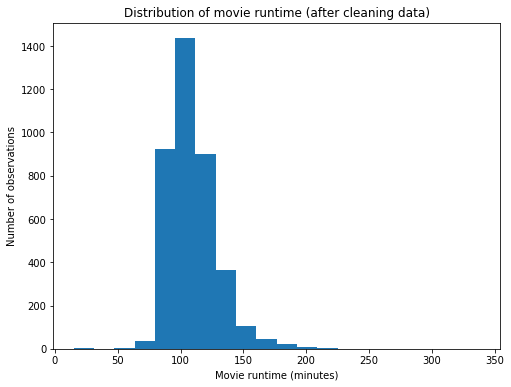

In [198]:
# Plot movie's runtime histogram:
histogram(df['runtime'], 20, 'Movie runtime (minutes)', 'Number of observations', 'Distribution of movie runtime (after cleaning data)')

In [199]:
# Find mean of movie's runtime:
df.runtime.mean()

109.22029060716139

The distribution is right-skewed and typical movie runtime is around 109 minutes.

### **Question 3. List top 10 movies with highest vote average score**

In [200]:
max_vote = df[['original_title', 'release_year', 'vote_average']].nlargest(10, 'vote_average').reset_index(drop = True)
max_vote

,original_title,release_year,vote_average
0,The Shawshank Redemption,1994,8.4
1,Stop Making Sense,1984,8.4
2,The Godfather,1972,8.3
3,Whiplash,2014,8.2
4,Fight Club,1999,8.1
5,The Dark Knight,2008,8.1
6,Pulp Fiction,1994,8.1
7,Forrest Gump,1994,8.1
8,The Godfather: Part II,1974,8.1
9,Schindler's List,1993,8.1


> None of these movies appeared on top 10 highest grossing movies. The Shawshank Redemption is the movie that receives the highest vote average score.

Next, the author will inspect movie's vote average score distribution:

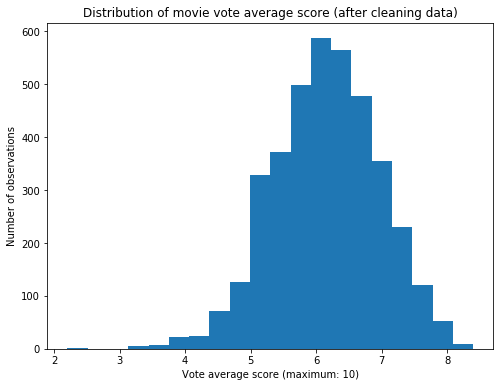

In [201]:
# Plot movie's vote average histogram:
histogram(df['vote_average'], 20, 'Vote average score (maximum: 10)', 'Number of observations', 'Distribution of movie vote average score (after cleaning data)')

In [202]:
# Find mean of movie's vote average:
df.vote_average.mean()

6.1681629475869224

The distribution is nearly normal (left-skewed) and typical vote average score that a typical movie will receive is 6.17 out of 10.

### **Question 4. List number of films released in each year**

In [203]:
# Compute number of films released yearly:
no_films_yearly = df['release_year'].value_counts().sort_index()
no_films_yearly

1960      5
1961     10
1962      7
1963      6
1964      7
1965      5
1966      5
1967     13
1968      9
1969      4
1970     11
1971     13
1972      8
1973     12
1974     13
1975      9
1976     15
1977     19
1978     17
1979     16
1980     23
1981     30
1982     26
1983     31
1984     42
1985     41
1986     48
1987     46
1988     57
1989     51
1990     53
1991     50
1992     53
1993     72
1994     62
1995     81
1996     86
1997     90
1998     92
1999    116
2000    106
2001    121
2002    127
2003    121
2004    147
2005    163
2006    169
2007    165
2008    167
2009    174
2010    178
2011    199
2012    158
2013    180
2014    165
2015    160
Name: release_year, dtype: int64

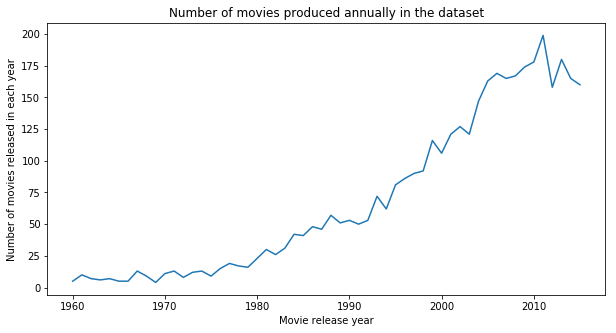

In [204]:
# Plot line graph:
plt.figure(figsize = (10,5))
plt.plot(no_films_yearly)
plt.xlabel('Movie release year')
plt.ylabel('Number of movies released in each year')
plt.title('Number of movies produced annually in the dataset')
plt.show()

> From line plot, it can be seen that since 1961 (first release_year in dataset) more films are produced as time goes by although the number drops a bit on year 2012.

### **Question 5: Find the relationship between these variables:**
- vote_average and runtime
- vote_average and revenue_adj
- budget_adj and revenue_adj

In [205]:
# Find relationship between selected variables:
relationship_mat = df[['vote_average', 'runtime', 'revenue_adj', 'budget_adj']].corr(method = 'pearson')
relationship_mat

,vote_average,runtime,revenue_adj,budget_adj
vote_average,1.000000,0.351712,0.266844,0.036803
runtime,0.351712,1.000000,0.280505,0.333976
revenue_adj,0.266844,0.280505,1.000000,0.570451
budget_adj,0.036803,0.333976,0.570451,1.000000


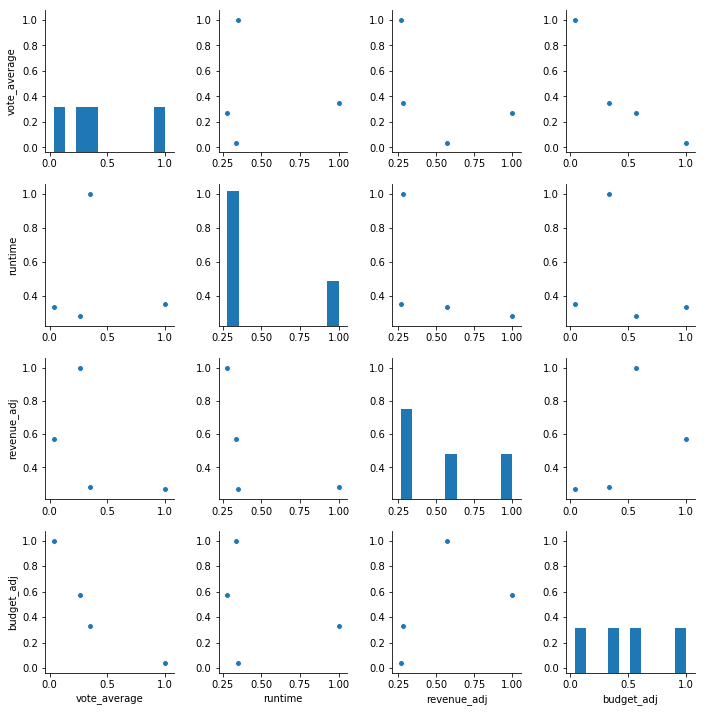

In [206]:
# Plot scatter plots:
sns.pairplot(relationship_mat);

> The correlation coefficient of interested variables are as follow:
 - 'vote_average' vs. 'runtime' = 0.351712
 - 'vote_average' vs. 'revenue_adj' = 0.266844
 - 'budget_adj' vs. 'revenue_adj'= 0.570451
 
 All relationships are positively correlated and moderately strong.

<a id='conclusions'></a>
## Conclusions:

**Based on research questions, the author has discovered the following insights:**

1. Most top 10 highest grossing films do not have high runtime and are considered as blockbuster movies as most movies are produced by well-known production companies with large budget and starred with popular actors and actresses.

2. None of top 10 highest grossing films has appeared on top 10 highest vote average score.

3. As time goes by more movies are produced compared to 1961 (first year appeared in the dataset), the number reaches its peak on 2011 and drops a bit after.

4. The relationship between vote_average and runtime, vote_average and revenue_adj, budget_adj and revenue_adj is all positively correlated and moderately strong.

**Note: potential limitation on this project are as follow:**

1. Only sample dataset is considered in this case.

2. Confirmation Bias: There is tendency to interpret an analysis based on author’s beliefs.

3. Confounding Variables: Tendency to draw an inaccurate insight due to the absence of uncollected feature(s) that is/are more relevant to the analysis.

## Submitting Project 

In [207]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0